In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("DataPoint.xlsx")

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data

,Fuel Type,RPM,Power(W),Thermal Efficiency(%),Volumetric Efficiency(%),BSFC(KG/KW*h),CO (%),CO2 (%),HC(ppm),NOx(ppm)
0,Gasoline(100%),1500,1050,0.2000,0.8700,0.360,3.250,0.80,850,595
1,Gasoline(100%),1600,1090,0.2080,0.8588,0.348,3.230,0.84,830,601
2,Gasoline(100%),1700,1130,0.2160,0.8476,0.336,3.210,0.88,810,607
3,Gasoline(100%),1800,1160,0.2220,0.8376,0.324,3.200,0.92,770,612
4,Gasoline(100%),1900,1180,0.2260,0.8288,0.312,3.200,0.96,710,616
5,Gasoline(100%),2000,1200,0.2300,0.8200,0.300,3.200,1.00,650,620
6,Gasoline(100%),2100,1292,0.2380,0.8040,0.280,3.120,1.04,610,620
7,Gasoline(100%),2200,1384,0.2460,0.7880,0.260,3.040,1.08,570,620
8,Gasoline(100%),2300,1484,0.2540,0.7760,0.250,2.960,1.12,540,621
9,Gasoline(100%),2400,1592,0.2620,0.7680,0.250,2.880,1.16,520,623


In [4]:
data.describe()

,RPM,Power(W),Thermal Efficiency(%),Volumetric Efficiency(%),BSFC(KG/KW*h),CO (%),CO2 (%),HC(ppm),NOx(ppm)
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2000.000000,1388.400000,0.273396,0.842451,0.325855,2.750036,0.830000,572.818182,554.618182
std,319.142369,216.149348,0.043618,0.037661,0.043054,0.331218,0.180442,140.974005,41.507916
min,1500.000000,1050.000000,0.200000,0.760000,0.250000,2.100000,0.450000,350.000000,480.000000
25%,1700.000000,1240.000000,0.238000,0.820000,0.291000,2.474000,0.710000,462.000000,524.000000
50%,2000.000000,1292.000000,0.268000,0.844000,0.328000,2.792000,0.830000,564.000000,551.000000
75%,2300.000000,1558.000000,0.302000,0.870000,0.360000,3.023000,0.950000,685.500000,588.000000
max,2500.000000,1850.000000,0.370000,0.910000,0.410000,3.250000,1.200000,850.000000,625.000000


In [5]:
data['Fuel Type']=data['Fuel Type'].replace('Gasoline(100%)',1)
data['Fuel Type']=data['Fuel Type'].replace('E 10%',2)
data['Fuel Type']=data['Fuel Type'].replace('E 20%',3)
data['Fuel Type']=data['Fuel Type'].replace('E 30%',4)
data['Fuel Type']=data['Fuel Type'].replace('E 40%',5)

In [6]:
data

,Fuel Type,RPM,Power(W),Thermal Efficiency(%),Volumetric Efficiency(%),BSFC(KG/KW*h),CO (%),CO2 (%),HC(ppm),NOx(ppm)
0,1,1500,1050,0.2000,0.8700,0.360,3.250,0.80,850,595
1,1,1600,1090,0.2080,0.8588,0.348,3.230,0.84,830,601
2,1,1700,1130,0.2160,0.8476,0.336,3.210,0.88,810,607
3,1,1800,1160,0.2220,0.8376,0.324,3.200,0.92,770,612
4,1,1900,1180,0.2260,0.8288,0.312,3.200,0.96,710,616
5,1,2000,1200,0.2300,0.8200,0.300,3.200,1.00,650,620
6,1,2100,1292,0.2380,0.8040,0.280,3.120,1.04,610,620
7,1,2200,1384,0.2460,0.7880,0.260,3.040,1.08,570,620
8,1,2300,1484,0.2540,0.7760,0.250,2.960,1.12,540,621
9,1,2400,1592,0.2620,0.7680,0.250,2.880,1.16,520,623


<Axes: >

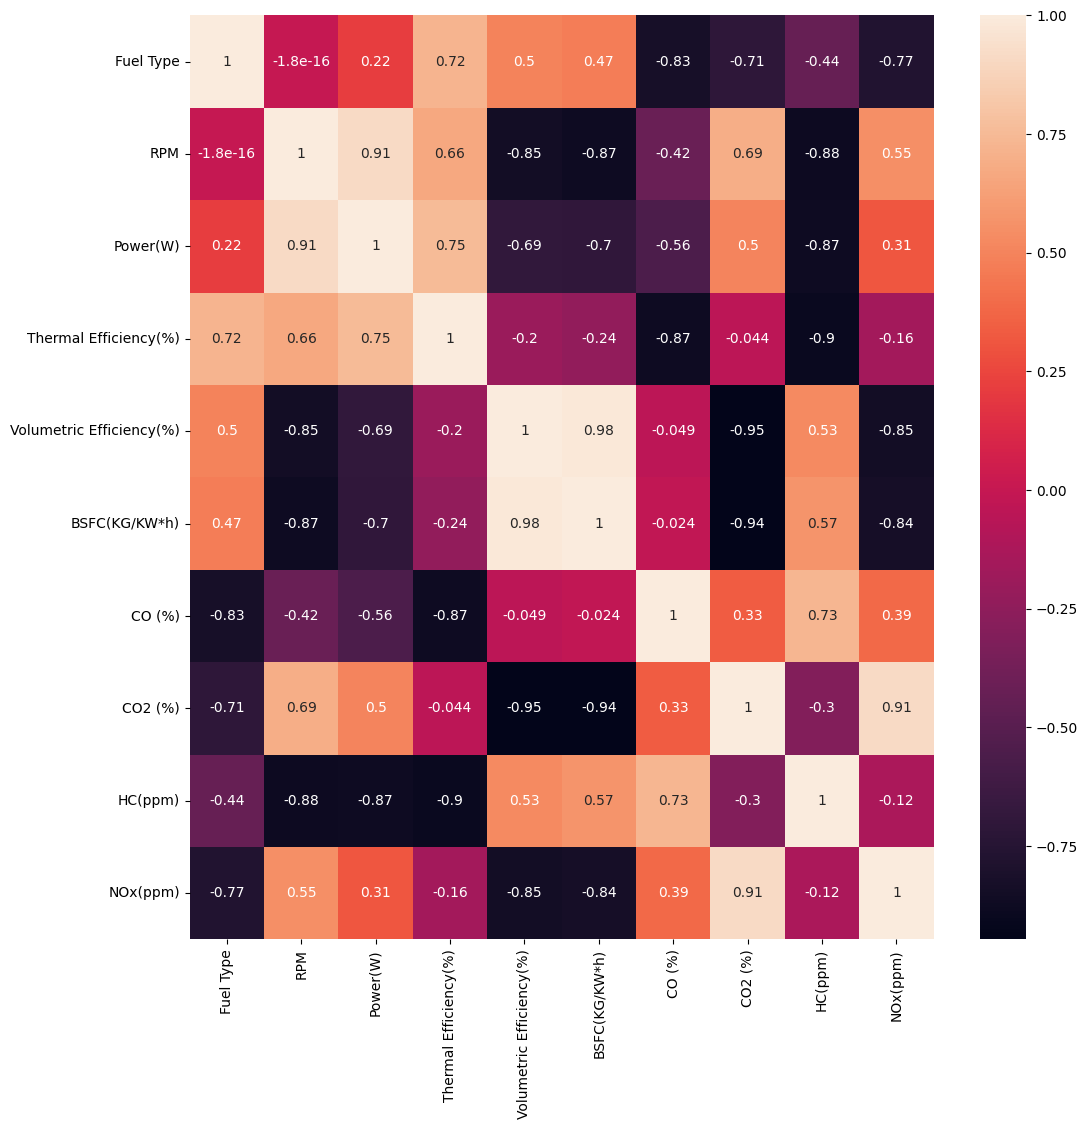

In [7]:
core=data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(core,annot=True)

In [8]:
input_parameter=['Fuel Type','RPM']
output_parameter=['Power(W)']

In [9]:
x=data[input_parameter]
y=data[output_parameter]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.3f}")


R² Score: 0.976


In [13]:
feature_importance = model.feature_importances_

# Create a DataFrame
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)

     Feature  Importance
1        RPM    0.929888
0  Fuel Type    0.070112


<Axes: xlabel='Importance', ylabel='Feature'>

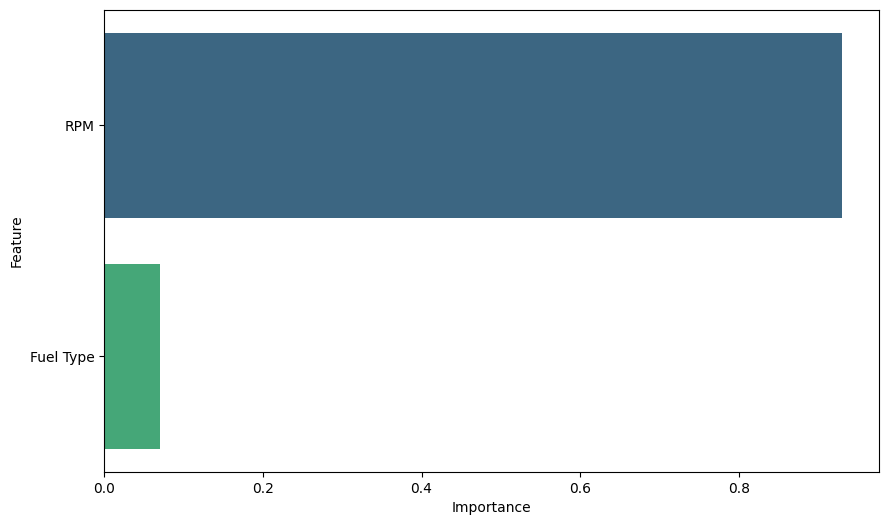

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette='viridis')


In [15]:
Fuel_Type=float(input("Fuel_Type :")) ### 3:- E 20 %

Fuel_Type :3


In [16]:
RPM=float(input("RPM :"))

RPM :1900


In [17]:
Power=model.predict([[Fuel_Type,RPM]]).flatten()

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
Power

array([1254.68])

In [19]:
# Actual BP==1257

In [20]:
Power = float(Power[0])

In [21]:
def Tor(Power,RPM):
    Torque=Power/RPM
    return Torque

In [22]:
Torque=Tor(Power,RPM)

In [23]:
Torque

0.6603578947368421

In [24]:
input_parameter1=['Fuel Type','RPM','Power(W)']
output_parameter1=['Thermal Efficiency(%)']

In [25]:
x1=data[input_parameter1]
y1=data[output_parameter1]

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train1, y_train1)

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [28]:
feature_importance1 = model1.feature_importances_

# Create a DataFrame
feature_df1 = pd.DataFrame({'Feature': X_train1.columns, 'Importance': feature_importance1})
feature_df1 = feature_df1.sort_values(by='Importance', ascending=False)
print(feature_df1)

     Feature  Importance
2   Power(W)    0.657228
0  Fuel Type    0.300475
1        RPM    0.042297


<Axes: xlabel='Importance', ylabel='Feature'>

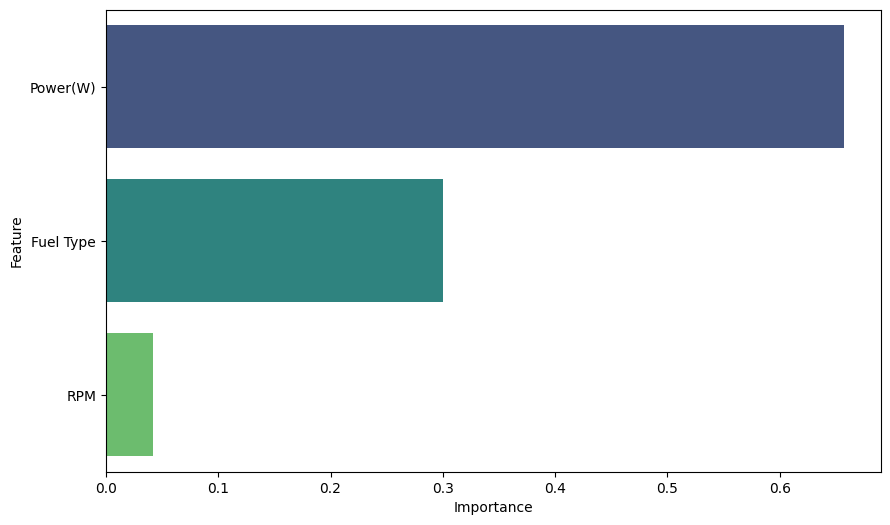

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_df1['Importance'], y=feature_df1['Feature'], palette='viridis')

In [30]:
y_pred1 = model1.predict(X_test1)

# Evaluate the model
r21 = r2_score(y_test1, y_pred1)
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)

print(f"R² Score: {r21:.3f}")
print(f"MAE: {mae1:.3f}")
print(f"RMSE: {rmse1:.3f}")

R² Score: 0.918
MAE: 0.010
RMSE: 0.014


In [31]:
Efficiency=float(model1.predict([[Fuel_Type,RPM,Power]]))

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\gaura\AppData\Local\Temp\ipykernel_17000\760489272.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Efficiency=float(model1.predict([[Fuel_Type,RPM,Power]]))


In [32]:
Efficiency

0.25469999999999976

In [33]:
# Actual Efficiency== 0.2580

In [34]:
input_parameter2=['Fuel Type','RPM','Power(W)','Thermal Efficiency(%)']
output_parameter2=['CO (%)','CO2 (%)','HC(ppm)','NOx(ppm)']

In [35]:
x2=data[input_parameter2]
y2=data[output_parameter2]

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

RandomForestRegressor(random_state=42)

In [38]:
feature_importance2 = model2.feature_importances_

# Create a DataFrame
feature_df2 = pd.DataFrame({'Feature': X_train2.columns, 'Importance': feature_importance2})
feature_df2 = feature_df2.sort_values(by='Importance', ascending=False)
print(feature_df2)

                 Feature  Importance
1                    RPM    0.505673
2               Power(W)    0.252902
3  Thermal Efficiency(%)    0.197924
0              Fuel Type    0.043500


<Axes: xlabel='Importance', ylabel='Feature'>

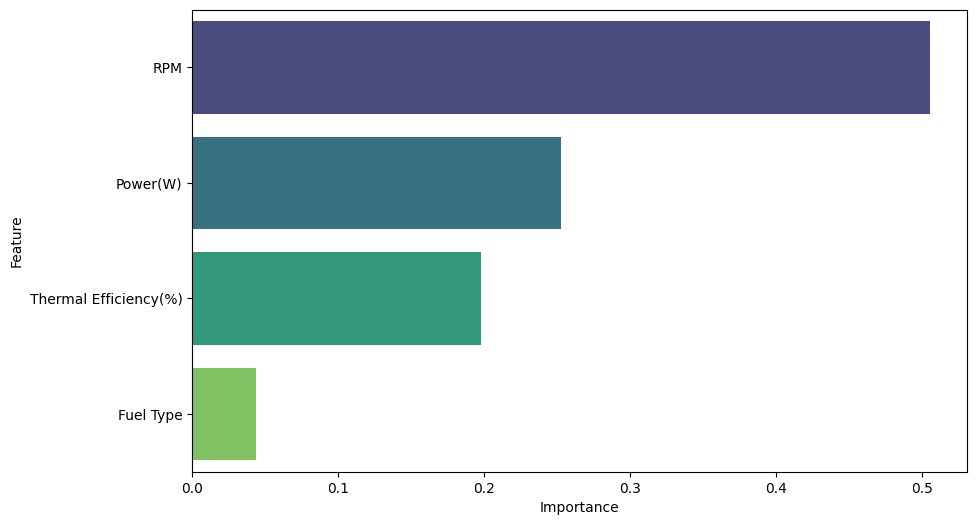

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_df2['Importance'], y=feature_df2['Feature'], palette='viridis')

In [40]:
y_pred2 = model2.predict(X_test2)

# Evaluate the model
r22 = r2_score(y_test2, y_pred2)

print(f"R² Score: {r22:.3f}")


R² Score: 0.843


In [41]:
model2.predict([[Fuel_Type,RPM,Power,Efficiency]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[  2.89424,   0.7963 , 622.85   , 536.58   ]])

In [42]:
# Actual CO (%)  ,CO2 (%) ,HC(ppm),  NOx(ppm)==2.880, 0.80, 584 , 532

In [43]:
data_new=pd.read_excel("DataPoint.xlsx")

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


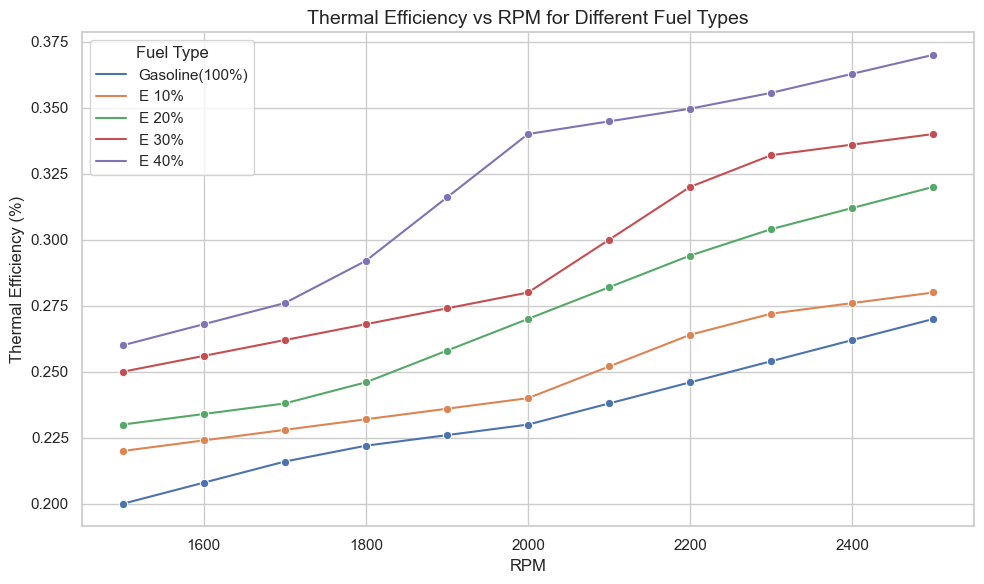

In [44]:
sns.set(style="whitegrid")

# Plot Thermal Efficiency vs RPM for each Fuel Type
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_new, x='RPM', y='Thermal Efficiency(%)', hue='Fuel Type', marker='o')

# Titles and labels
plt.title('Thermal Efficiency vs RPM for Different Fuel Types', fontsize=14)
plt.xlabel('RPM')
plt.ylabel('Thermal Efficiency (%)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

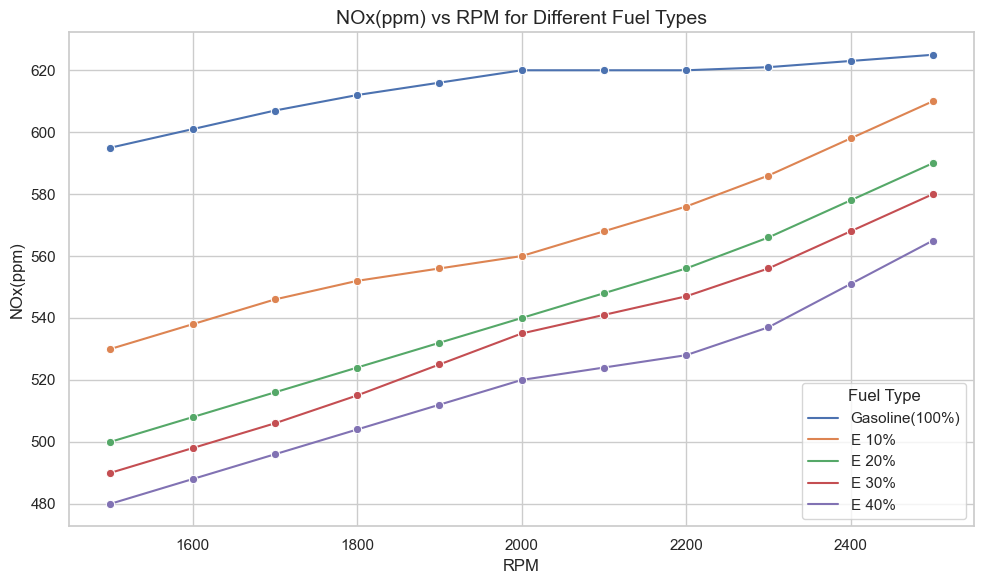

In [45]:
sns.set(style="whitegrid")

# Plot Thermal Efficiency vs RPM for each Fuel Type
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_new, x='RPM', y='NOx(ppm)', hue='Fuel Type', marker='o')

# Titles and labels
plt.title('NOx(ppm) vs RPM for Different Fuel Types', fontsize=14)
plt.xlabel('RPM')
plt.ylabel('NOx(ppm)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

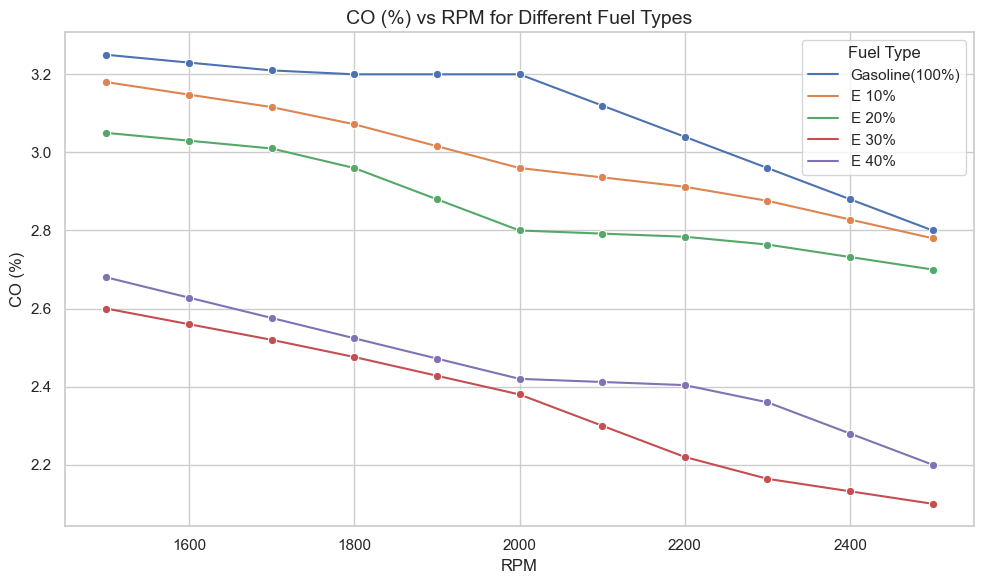

In [46]:
sns.set(style="whitegrid")

# Plot Thermal Efficiency vs RPM for each Fuel Type
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_new, x='RPM', y='CO (%)', hue='Fuel Type', marker='o')

# Titles and labels
plt.title('CO (%) vs RPM for Different Fuel Types', fontsize=14)
plt.xlabel('RPM')
plt.ylabel('CO (%)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()